Generate MoM map
* base geojson: all the watersheds
* warning geojson: watersheds with warning
* watch geojson: watersheds with watch

In [1]:
# testing code
base_g = "research_watersheds.geojson"
warning_g = "pakistan2022/geojson/2022083000_Warning.geojson"
watch_g = "pakistan2022/geojson/2022083000_Watch.geojson"

In [2]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
base = gpd.read_file(base_g)
warning = gpd.read_file(warning_g)
watch = gpd.read_file(watch_g)

In [8]:
# extract bounding box from base geojson
# then use it to setup the plot limit
[minx, miny, maxx, maxy] = base.total_bounds

In [4]:
datestr = os.path.basename(warning_g).split("_")[0]

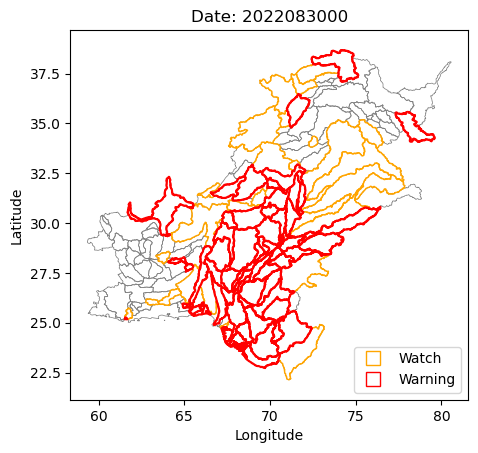

In [19]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots()
ax.set_aspect('equal')
base.plot(ax = ax, facecolor='none', edgecolor='grey',linewidth =0.5)
watch.plot(ax = ax, facecolor='white', edgecolor = "orange", linewidth =1, label="Watch")
warning.plot(ax = ax, facecolor="white", edgecolor = "red",linewidth = 1.5, label="Warning")
plt.title("Date: " + datestr)

lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, markeredgecolor =t.get_edgecolor(),  markerfacecolor=t.get_facecolor())
    for t in ax.collections[1:]
]
labels = [t.get_label() for t in ax.collections[1:]]
ax.legend(lines, labels,loc="lower right")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.xlim(minx -1,maxx + 1)
plt.ylim(miny - 1, maxy + 1)
plt.show();